In [3]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
print('PAKAGES LOADED.')

PAKAGES LOADED.


### Load and Plot

In [4]:
def print_typeshape(img):
    print(f"type: {type(img)}")
    print(f"shape: {img.shape}")

In [15]:
cat = cv2.imread('./data/cat2.jpg')
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)
cat = np.asarray(cat)
print_typeshape(cat)

type: <class 'numpy.ndarray'>
shape: (1920, 1280, 3)


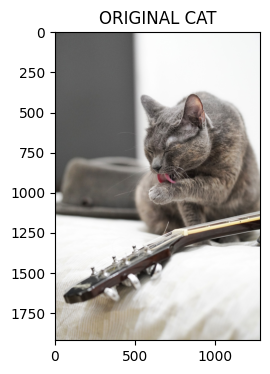

In [16]:
plt.figure(figsize=(5, 4))
plt.imshow(cat)
plt.title("ORIGINAL CAT")
plt.draw()

In [17]:
cat2 = cv2.imread('./data/cat2.jpg')
cat2 = cv2.cvtColor(cat2, cv2.COLOR_BGR2RGB)
cat2 = np.asarray(cat2, np.float64)

print_typeshape(cat2)

type: <class 'numpy.ndarray'>
shape: (1920, 1280, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


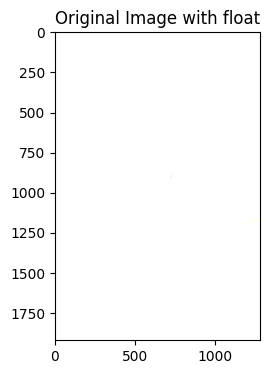

In [18]:
plt.figure(figsize=(5, 4))
plt.imshow(cat2)
plt.title("Original Image with float")
plt.draw()

### 왜 이상할까?
* plt.imshow에서는 데이터 타입이 float32, float64 등의 부동 소수점 타입인 경우 [0, 1]로 정규화되어 있어야 한다.
* 부동 소수점 타입은 플로팅 함수가 특정 범위의 값을 가정하기 어려울 수 있기 때문이다.

In [19]:
cat3 = cv2.imread('./data/cat2.jpg')
cat3 = cv2.cvtColor(cat3, cv2.COLOR_BGR2RGB)
cat3 = np.asarray(cat3, np.float64)/255.
print_typeshape(cat3)

type: <class 'numpy.ndarray'>
shape: (1920, 1280, 3)


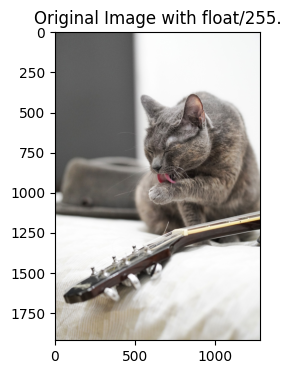

In [20]:
plt.figure(figsize=(5, 4))
plt.imshow(cat3)
plt.title("Original Image with float/255.")
plt.draw()

### Resize

In [28]:
cat = cv2.imread('./data/cat2.jpg')
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)
catsmall = cv2.resize(cat, (100, 200))

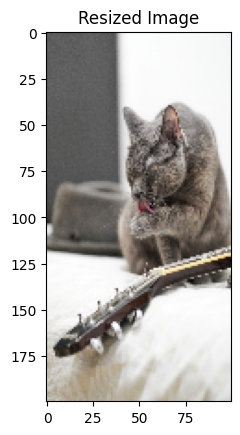

In [29]:
plt.figure(1)
plt.imshow(catsmall)
plt.title("Resized Image")
plt.draw()

### GrayScale

In [31]:
def rgb2gray(rgb):
    if len(rgb.shape) == 3:
        return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])
    else:
        print("Current Image is GRAY!")
        return rgb

In [32]:
catsmallgray = rgb2gray(catsmall)
print_typeshape(catsmallgray)

type: <class 'numpy.ndarray'>
shape: (200, 100)


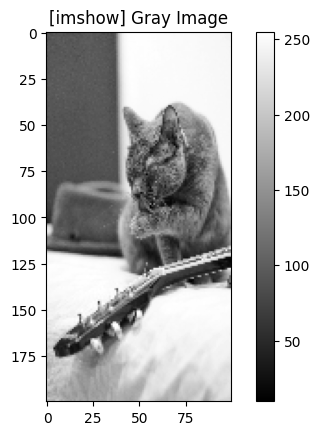

In [33]:
plt.imshow(catsmallgray, cmap=plt.get_cmap("gray"))
plt.title("[imshow] Gray Image")
plt.colorbar()
plt.draw()

### Reshape

In [34]:
catrowvec = np.reshape(catsmallgray, (1, -1))
print_typeshape(catrowvec)

catmatrix = np.reshape(catrowvec, (100, -1))
print_typeshape(catmatrix)

type: <class 'numpy.ndarray'>
shape: (1, 20000)
type: <class 'numpy.ndarray'>
shape: (100, 200)


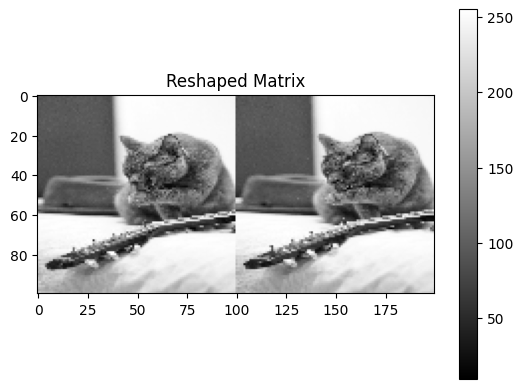

In [35]:
plt.imshow(catmatrix, cmap=plt.get_cmap("gray"))
plt.title("Reshaped Matrix")
plt.colorbar()
plt.draw()

### Load from Folder

In [40]:
cwd = os.getcwd()
path = cwd + "/img/"
filelist = os.listdir(path)
print(filelist)

for i, f in enumerate(filelist):
    print(f"[{i}] {f}")

['cute-3162209_1920.jpg', 'guinea-pig-2513177_1920.jpg', 'hamster-1772742_1920.jpg', 'hamster-3528445_1920.jpg', 'hamster-5203446_1920.jpg']
[0] cute-3162209_1920.jpg
[1] guinea-pig-2513177_1920.jpg
[2] hamster-1772742_1920.jpg
[3] hamster-3528445_1920.jpg
[4] hamster-5203446_1920.jpg


In [42]:
valid_exts = [".jpg", ".gif", ".png", ".tga", ".jpeg"]
imgs = []
names = []
for f in filelist:
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_exts:
        continue
    
    fullpath = os.path.join(path, f)

    img = cv2.imread(fullpath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.asarray(img)

    imgs.append(img)
    names.append(os.path.splitext(f)[0])

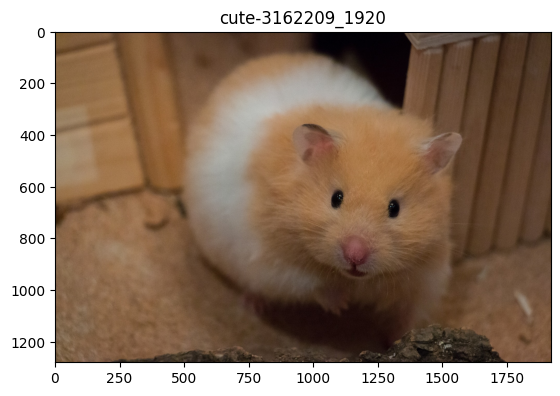

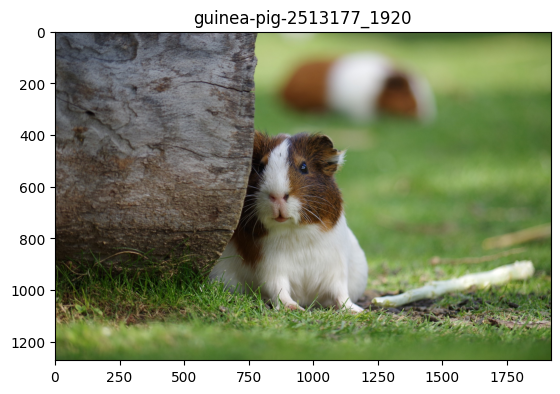

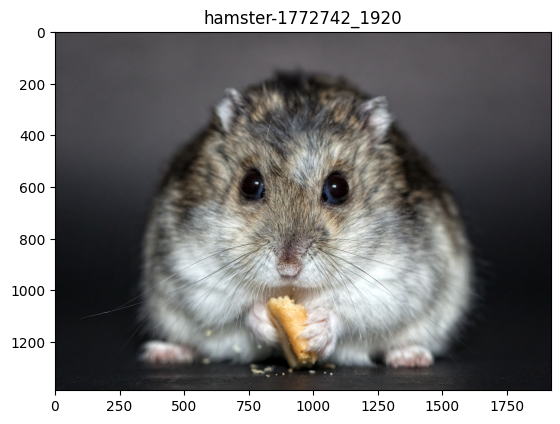

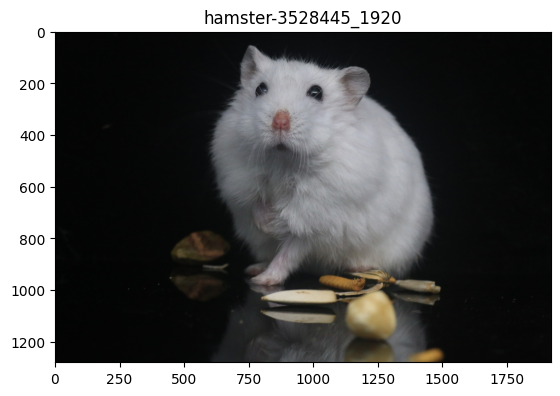

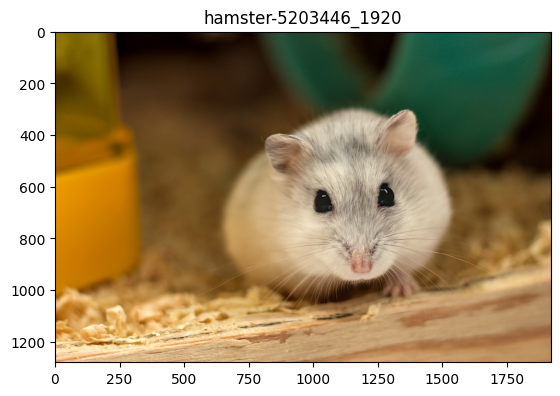

In [43]:
for img, name in zip(imgs, names):
    plt.imshow(img)
    plt.title(name)
    plt.show()